In [1]:
import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7

#### Rui Qu 802619 

The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

In [3]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import collections
import pandas as pd
import matplotlib.pyplot as plt


class tf:
    def __init__(self, text=None):
        
        if text is None:
            text = {}
        else:
            self.text = text
        self.text=text
        
        self.terms=['cat','dog','mammals','mouse','pet']
    def extract(self, text):
        extext=[]
        for i in text.split():
            if i in self.terms:
                extext.append(i)
        return extext
        
    def freq(self,text):
        extract_text = self.extract(text)
        frequency = collections.Counter(extract_text)
        return frequency

    def computeTF(self,text):
        tfDict = {}
        bowCount = len(text.split())
        dict = self.freq(text)
        for i in dict.items():
            tfDict[i[0]] = i[1]/float(bowCount) 
        return tfDict   
t=tf()

q = "mouse cat pet mammals"
d1 = "cat is a pet dog is a pet and mouse may be a pet too"
d2 = "cat dog and mouse are all mammals"
d3 = "cat and dog get along well but cat may eat a mouse"
terms=['cat','dog','mammals','mouse','pet']

pd.DataFrame([t.computeTF(q),t.computeTF(d1),t.computeTF(d2),t.computeTF(d3)]).fillna(0)


,mouse,cat,pet,mammals,dog
0,0.250000,0.250000,0.25,0.250000,0.000000
1,0.066667,0.066667,0.20,0.000000,0.066667
2,0.142857,0.142857,0.00,0.142857,0.142857
3,0.083333,0.166667,0.00,0.000000,0.083333


In [4]:
tf= pd.DataFrame([t.computeTF(q),t.computeTF(d1),t.computeTF(d2),t.computeTF(d3)]).fillna(0)

tfidf=[]
percent = np.array([5,20,2,10,60])
idf = np.log(100 / percent)
print(idf)

tfidf.append(np.array(tf.cat)[:]*idf[0])
tfidf.append(np.array(tf.dog)[:]*idf[1])
tfidf.append(np.array(tf.mammals)[:]*idf[2])
tfidf.append(np.array(tf.mouse)[:]*idf[3])
tfidf.append(np.array(tf.pet)[:]*idf[4])

tfidf=np.array(tfidf)
print(tfidf)

[2.99573227 1.60943791 3.91202301 2.30258509 0.51082562]
[[0.74893307 0.19971548 0.42796175 0.49928871]
 [0.         0.10729586 0.2299197  0.13411983]
 [0.97800575 0.         0.55886043 0.        ]
 [0.57564627 0.15350567 0.32894073 0.19188209]
 [0.12770641 0.10216512 0.         0.        ]]


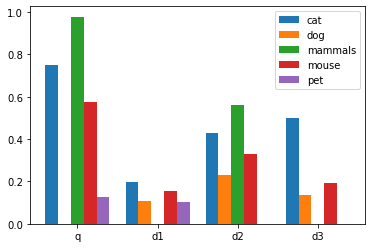

Similarities: [0.95469481 0.64319374 0.62888464]


In [5]:
#plot bar-chart
docslabel=['q','d1','d2','d3']
docs=[eval(x) for x in docslabel]
size = 4
index = np.arange(size)
total_width, n = 0.8, 5
width = total_width / n
index = index - (total_width - width) / 2

fig = plt.figure()
for i in range(5):
    if i==2:
        plt.bar(index+i*width, tfidf[i], width=width, label=terms[i], tick_label=docslabel)
    else:
        plt.bar(index+i*width, tfidf[i], width=width, label=terms[i])
plt.legend()
plt.show()

def evaluateSimilarity(query,docs):
    evaluation=np.array([np.sum(query*doc)/(np.sqrt(np.sum(query**2))*np.sqrt(np.sum(doc**2))) for doc in docs])
    srtArg= np.argsort(evaluation)[::-1]
    srt = np.sort(evaluation)[::-1]
    return [srtArg,srt]

similarity = evaluateSimilarity(tfidf.T[0],tfidf.T[1:4,])

print('Similarities:',similarity[1])


The relative ranking is $d2 > d3 > d1$.

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:

$Recall=\frac{True\ positives}{Total\ number\ of\ actual\ positives}=\frac{TP}{TP + FN}=\frac{300}{300 + 50}=0.857$

$Precision=\frac{True\ positives}{Total\ number\ of\ positives\ predicted}=\frac{TP}{TP+FP}=\frac{300}{500}=0.6$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 

Part1: Stage I.A

1. In the second image, there're shade part in the left half of the buliding, while the right half is much brighter. In SIFT we aim to find Key locations, which are defined as maxima and minima of the result of difference of Gaussians function applied in scale space to a series of smoothed and resampled images. In this case it has limited influence on matching becaues the main features(e.g. edge of the building) is pretty clear. To avoid this problem we can introduce a modification of the k-d tree algorithm called the best-bin-first search method that can identify the nearest neighbors with high probability using only a limited amount of computation.

2. It happens when image structure is non planar (not lying or able to be confined within a single plane : having a three-dimensional quality). Because SIFT computes an histogram of the gradient orientations in a Gaussian window with a standard deviation. This histogram is then smoothed and the maximum is selected. In addition to the biggest mode, up to other three modes whose amplitude is within the 80% of the biggest mode are retained and returned as additional orientations. 

Part1: Stage I.B

1. Because the descriptor is highly distinctive and partially invariant to the remaining variations such as illumination, 3D viewpoint, etc. Orientation histograms are computed from magnitude and orientation values of samples in a 16×16 region around the keypoint such that each histogram contains samples from a 4×4 subregion of the original neighborhood region. Thus the discriptors are larger region (shown in blue) than the detection.

2. It's because the high dimensionality of features may cause more dismatches than a database of local features. Changing light may not be a issue because, in general, SIFT is also robust to changes in illumination, noise, and minor changes in viewpoint. Generally probabilistic algorithms such as k-d trees with best bin first search can be used to remove mismatches.

Part1: Stage I.C

1. The best candidate match for each keypoint is found by identifying its nearest neighbor in the database of keypoints from training images. The nearest neighbors are defined as the keypoints with minimum Euclidean distance from the given descriptor vector. The probability that a match is correct can be determined by taking the ratio of distance from the closest neighbor to the distance of the second closest. Lowe rejected all matches in which the distance ratio is greater than 0.8, which eliminates 90% of the false matches while discarding less than 5% of the correct matches. 

Disparity gradient constraint and the RANSAC algorithm can be used to purify the matching points．

Part2



Part3: Stage III.A

1. When original maxNumChecks=1014, Matches on quantized descriptors: 46 matches in 0.0241s Verified matches on quantized descriptors: 10 matches

When I set maxNumChecks=16384, Matches on quantized descriptors: 46 matches in 0.0424s Verified matches on quantized descriptors: 10 matches

Thus when the number of vocabulary and the time for computing decreases dramatically, the number of inliers only has a small reduction. So the difficulty for computing the transformation doesn't affected much by the size.

2. Because the descriptor quantization for database images can be pre-computed, therefore it doesn't have to be part of execution time for a query.

3. 

Part3: Stage III.B

1. There 25 images sorted from largest score in the plots.  the top image is the same as the query image 

Part3: Stage III.C
1. Because the score in this case is the number of inlier words
2. The irrelevant images have lower score. So the retrieval results improved after geometric verification.
